# MACHINE LEARNING EXAM-UNSUPERVISED LEARNING

### IMPORTING NECESSARY LIBRARIES..

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\ELCOT\Desktop\ml_Paper2\credit_card.csv")

In [3]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [4]:
df.shape

(8950, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## EDA

In [7]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## checking missing value

In [11]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
df = df.dropna(axis=0)


In [10]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [23]:
upper = df.PRC_FULL_PAYMENT.mean() + 3*df.PRC_FULL_PAYMENT.std()

lower = df.PRC_FULL_PAYMENT.mean() -3*df.PRC_FULL_PAYMENT.std()

print(upper)

print(lower)

1.0481163530677073
-0.7295091034150882


In [24]:
new_df= df[(df.PRC_FULL_PAYMENT<upper) & (df.PRC_FULL_PAYMENT>lower)]

In [25]:
df['zscore'] = ( df.PRC_FULL_PAYMENT - df.PRC_FULL_PAYMENT.mean() ) / df.PRC_FULL_PAYMENT.std()

In [26]:
df_new = df[(df.zscore>-3) & (df.zscore<3)]

df_new

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,-0.537696
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.212368
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,-0.537696
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,-0.537696
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,-0.537696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,-0.537696
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1.149949
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0.306126
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0.306126


## correlated variables

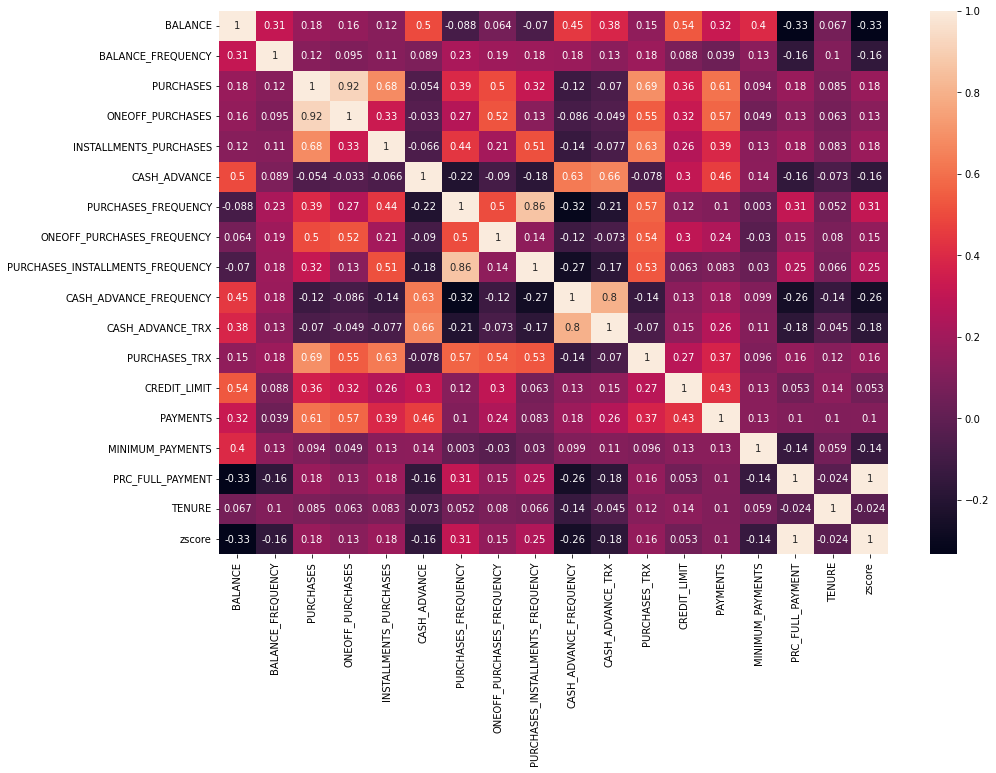

In [27]:
corr = df.drop('CUST_ID',axis=1).corr()
plt.figure(figsize= (15,10))
sns.heatmap(corr, annot = True);

# PCA

In [28]:
import copy
data2 = copy.deepcopy(df) # copy of original dataset
data2.drop ('CUST_ID',axis=1, inplace = True)
datascaled2=data2.apply(zscore)

In [29]:
cov_matrix = np.cov(datascaled2.T) # relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00011581  0.31017637  0.17610348  0.16000315  0.12212286  0.49564301
  -0.08846968  0.06383903 -0.06959004  0.44535873  0.38243273  0.14790434
   0.53558019  0.32286739  0.39871509 -0.33363241  0.06699485 -0.33363241]
 [ 0.31017637  1.00011581  0.12264895  0.09526524  0.11475233  0.08904616
   0.22818444  0.18748913  0.18418077  0.18115313  0.13328066  0.18311592
   0.08769244  0.03917363  0.13253459 -0.15697898  0.10472654 -0.15697898]
 [ 0.17610348  0.12264895  1.00011581  0.91688639  0.67933756 -0.05376645
   0.3930452   0.49744167  0.31606153 -0.12487702 -0.07028537  0.68881137
   0.35846691  0.60685263  0.09385287  0.17646765  0.08455498  0.17646765]
 [ 0.16000315  0.09526524  0.91688639  1.00011581  0.3296878  -0.03324821
   0.26549123  0.5245748   0.12839467 -0.08642311 -0.04871085  0.54537582
   0.32065058  0.57091645  0.04874689  0.12990501  0.0634072   0.12990501]
 [ 0.12212286  0.11475233  0.67933756  0.3296878   1.00011581 -0.06610672
   0.4412445

In [30]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[ 4.29308922e-02  4.15614698e-01  1.18247423e-01  5.35719633e-02
  -2.32352127e-01  5.05886156e-02  2.39124692e-01  2.07178977e-01
  -1.56470038e-01  8.08327520e-02 -1.62421021e-01  5.08211465e-01
  -5.18544309e-01  2.17671613e-01  1.41224122e-01 -5.36776428e-03
  -4.23478639e-05 -1.22259571e-16]
 [ 8.57271440e-02  1.56469947e-01  2.92301087e-01  3.05083925e-01
   1.53089408e-01  3.94838102e-01  1.96378376e-01 -3.79618946e-01
  -5.89341546e-01 -1.34153815e-01  1.48173119e-01 -9.33321055e-02
   1.70678775e-01  4.36691362e-02 -2.30508576e-02 -9.32432634e-03
  -2.19640919e-05  4.55868910e-15]
 [ 3.96095795e-01  1.09871093e-01 -3.64460580e-03 -2.69465830e-01
   9.16005165e-02 -1.68135785e-01 -4.62042880e-02 -1.69926017e-01
  -1.26514252e-01  5.50670972e-02 -1.94834703e-01 -7.82639346e-02
  -1.11068179e-01 -6.28672641e-02 -2.24793444e-01  1.47427181e-03
   7.48862215e-01 -1.18431408e-10]
 [ 3.30616037e-01  1.19100669e-01 -4.25439916e-02 -4.05493050e-01
   1.87640188e-01 -1.25

In [31]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [33]:
eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:5]



[(4.744744412370808,
  array([ 0.04293089,  0.08572714,  0.3960958 ,  0.33061604,  0.3288019 ,
         -0.06424715,  0.33364969,  0.28767451,  0.28609564, -0.13435807,
         -0.0890322 ,  0.37866555,  0.18583702,  0.238999  ,  0.03643407,
          0.1856586 ,  0.07178503,  0.1856586 ])),
 (3.63399032380947,
  array([ 0.4156147 ,  0.15646995,  0.10987109,  0.11910067,  0.0408062 ,
          0.39722349, -0.12971622,  0.0318188 , -0.12234229,  0.38789161,
          0.37564674,  0.05376919,  0.25513336,  0.27642175,  0.1818552 ,
         -0.2397438 ,  0.0166712 , -0.2397438 ])),
 (1.808499887054922,
  array([ 0.11824742,  0.29230109, -0.00364461, -0.04254399,  0.0695477 ,
         -0.26208736,  0.14640704,  0.04360703,  0.16369594, -0.17824388,
         -0.22458228,  0.12205371, -0.10174901, -0.23576036,  0.178281  ,
         -0.52650574,  0.16078876, -0.52650574])),
 (1.4630842725957864,
  array([ 0.05357196,  0.30508393, -0.26946583, -0.40549305,  0.10805704,
          0.16965333,  

## K-means Clustering

In [39]:
datascaled=df.drop('CUST_ID',axis=1).apply(zscore)

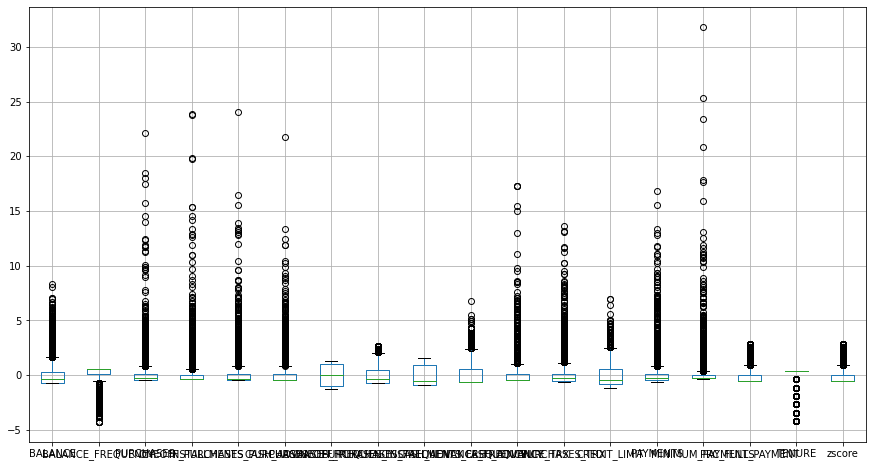

In [40]:
plt.figure(figsize= (15,8))
datascaled.boxplot();

In [41]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model= KMeans(n_clusters=k)
    model.fit(datascaled)
    prediction=model.predict(datascaled)
    meanDistortions.append(sum(np.min(cdist(datascaled, model.cluster_centers_, 'euclidean'), axis=1)) / datascaled.shape[0])

plt.figure(figsize= (12,6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

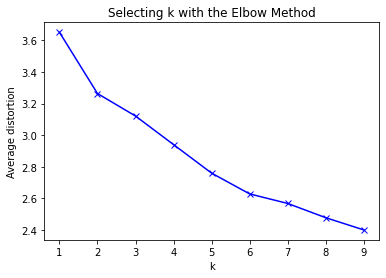

In [42]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method');

In [43]:
from sklearn.metrics import silhouette_score

for j in range(2,10):
    model= KMeans(n_clusters=j)
    model.fit(datascaled)
    model_silhouette_score=silhouette_score(datascaled,model.labels_).round(3)
    print (' For K=',j, 'Silhouette Score ---->',model_silhouette_score)

 For K= 2 Silhouette Score ----> 0.208
 For K= 3 Silhouette Score ----> 0.187
 For K= 4 Silhouette Score ----> 0.232
 For K= 5 Silhouette Score ----> 0.212
 For K= 6 Silhouette Score ----> 0.199
 For K= 7 Silhouette Score ----> 0.204
 For K= 8 Silhouette Score ----> 0.218
 For K= 9 Silhouette Score ----> 0.216


In [44]:
kmeans = KMeans(n_clusters=3,n_init =15,random_state=85)
kmeans.fit(datascaled)

KMeans(n_clusters=3, n_init=15, random_state=85)

In [48]:
data_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
data_labels.index = data_labels.index+1
data_labels['labels'] = data_labels['labels'].astype('category')

In [50]:
data_labeled = df.join(data_labels)
datascaled_labeled = datascaled.join(data_labels)

2    4292
1    3441
0     606
Name: labels, dtype: int64


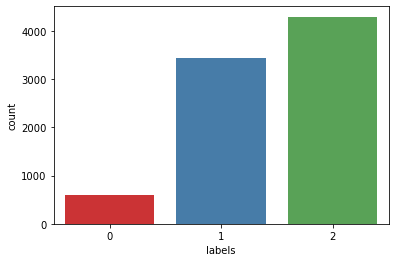

In [51]:
sns.countplot(data_labeled['labels'],palette='Set1');
print(data_labeled['labels'].value_counts())